In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import keras
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Importing the necessary packages
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor



#from keras.optimizers import Adam
from keras.optimizers import adam_v2
from keras.optimizers import Adam
from keras import regularizers
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [3]:
df = pd.read_csv("gas_turbines.csv")
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


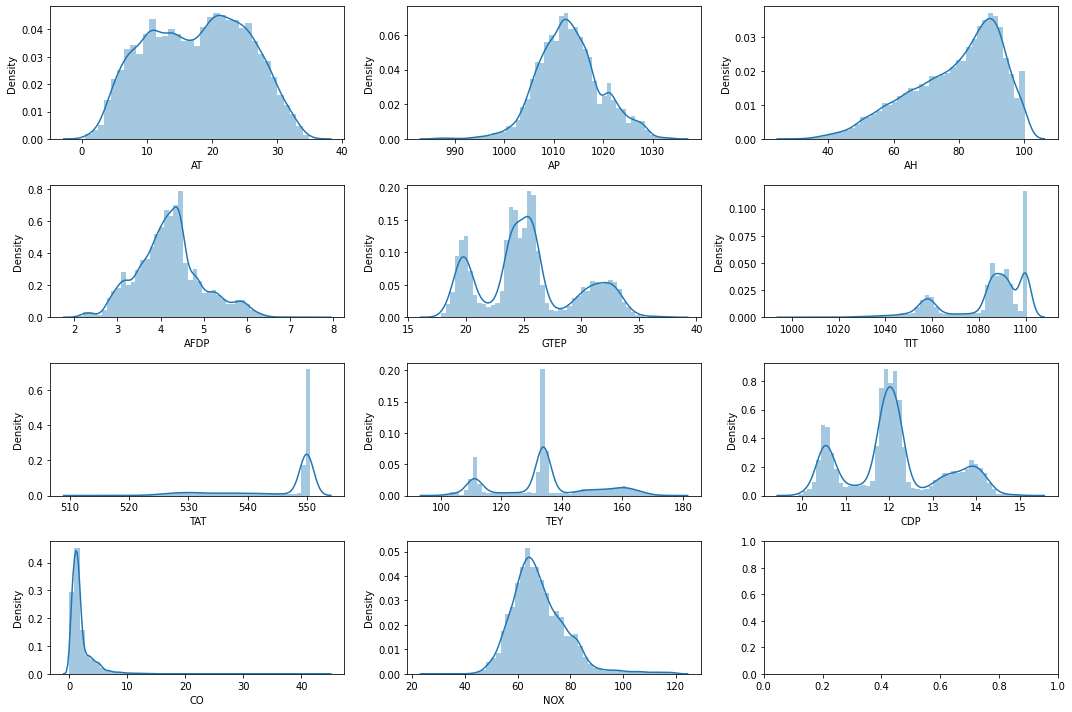

In [5]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.distplot(df.AT, ax=ax[0,0])
sns.distplot(df.AP, ax=ax[0,1])
sns.distplot(df.AH, ax=ax[0,2])
sns.distplot(df.AFDP, ax=ax[1,0])
sns.distplot(df.GTEP, ax=ax[1,1])
sns.distplot(df.TIT, ax=ax[1,2])
sns.distplot(df.TAT, ax=ax[2,0])
sns.distplot(df.TEY, ax=ax[2,1])
sns.distplot(df.CDP, ax=ax[2,2])
sns.distplot(df.CO, ax=ax[3,0])
sns.distplot(df.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()

# Cheacking for the outliers 

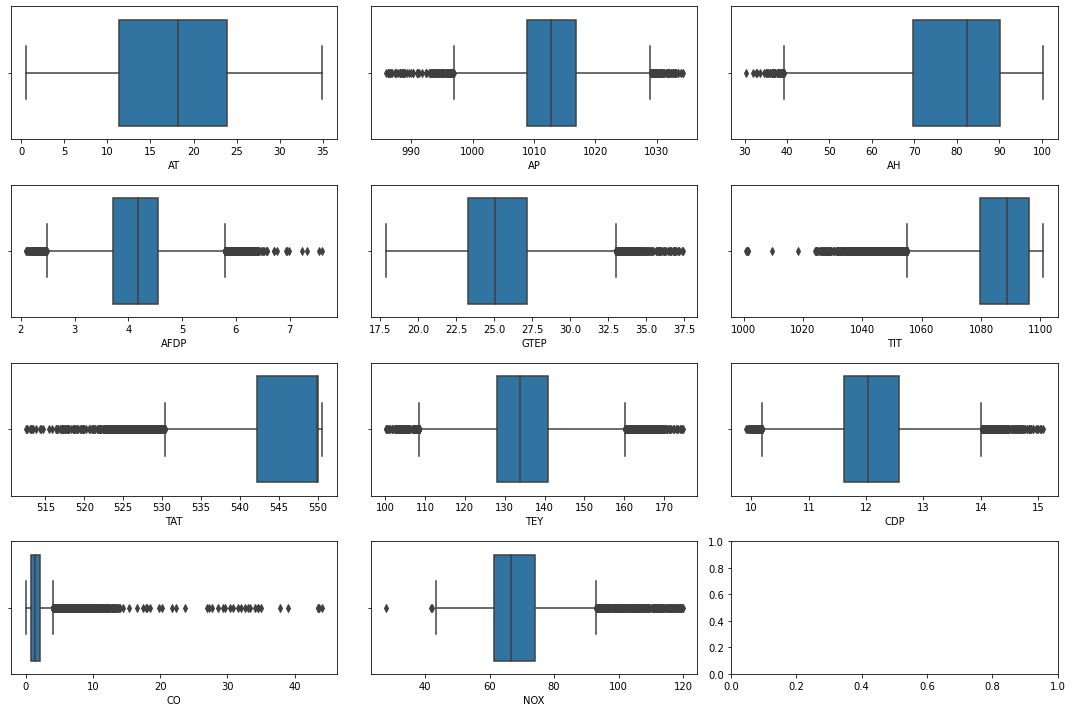

In [6]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.boxplot(df.AT, ax=ax[0,0])
sns.boxplot(df.AP, ax=ax[0,1])
sns.boxplot(df.AH, ax=ax[0,2])
sns.boxplot(df.AFDP, ax=ax[1,0])
sns.boxplot(df.GTEP, ax=ax[1,1])
sns.boxplot(df.TIT, ax=ax[1,2])
sns.boxplot(df.TAT, ax=ax[2,0])
sns.boxplot(df.TEY, ax=ax[2,1])
sns.boxplot(df.CDP, ax=ax[2,2])
sns.boxplot(df.CO, ax=ax[3,0])
sns.boxplot(df.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()

In [7]:
df['TEY'].value_counts()

133.74    150
133.78    148
133.67    143
133.76    142
133.79    127
         ... 
126.30      1
130.81      1
144.89      1
121.46      1
115.52      1
Name: TEY, Length: 4207, dtype: int64

In [8]:
# Standardization
a = StandardScaler()
a.fit(df)
df_standardized = a.transform(df)

In [9]:
pd.DataFrame(df_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04
mean,4.913654e-16,-1.875504e-14,2.570219e-16,1.511894e-16,-7.559468e-17,-3.260021e-15,1.640405e-15,1.081004e-15,1.965462e-16,3.779734e-17,4.233302e-16
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00,-2.779497e+00,-1.806771e+00,-5.021933e+00,-4.188141e+00,-2.149097e+00,-1.992416e+00,-8.874862e-01,-3.861033e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01,-6.266930e-01,-5.091458e-01,-2.540512e-01,-4.101146e-01,-3.919003e-01,-4.354335e-01,-5.015202e-01,-6.578107e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01,-1.854065e-02,-8.075681e-02,2.965544e-01,5.712570e-01,-2.580448e-02,-7.011925e-02,-2.620452e-01,-1.518527e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01,4.612196e-01,4.228638e-01,7.382490e-01,5.928675e-01,4.236815e-01,4.311680e-01,8.455882e-02,5.486567e-01
max,2.266234e+00,3.275970e+00,1.528011e+00,4.486233e+00,2.871006e+00,1.028678e+00,6.627839e-01,2.553607e+00,2.700105e+00,1.895949e+01,4.937717e+00


# Feature Selection

In [10]:
X = df.drop('TEY', axis = 1)
y = df.iloc[:,7]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Feature 0: 0.403097
Feature 1: 0.143697
Feature 2: 0.091447
Feature 3: 0.657288
Feature 4: 1.590960
Feature 5: 1.303351
Feature 6: 0.912582
Feature 7: 1.710011
Feature 8: 0.506743
Feature 9: 0.303405


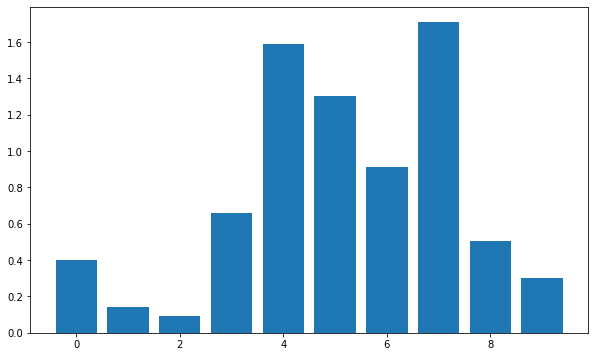

In [14]:
# scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [15]:
X = df.drop(['TEY','AT','AP','AH','CO','NOX'], axis = 1)
y = df.iloc[:,7]

# Tuning of Hyperparameters :- 

In [16]:
n_cols = X.shape[1]
input_shape = (n_cols, )

# Creates a model given an activation and learning rate
def create_model(learning_rate=0.01, activation='relu'):
  
    # Create an Adam optimizer with the given learning rate
    opt = Adam(lr=learning_rate)
  
    # Create your binary classification model  
    model = Sequential()
    model.add(Dense(4, activation = activation,
                         input_shape = input_shape,
                         activity_regularizer=regularizers.l2(1e-5)))
    model.add(Dropout(0.00))
    model.add(Dense(2, activation = activation, 
                         activity_regularizer=regularizers.l2(1e-5)))
    model.add(Dropout(0.00))
    model.add(Dense(1, activation = activation))

# Compile the model
    model.compile(optimizer = opt,
                  loss = "mean_absolute_error",
                  metrics=['mse', "mape"])
    return model

In [17]:
# Create a KerasClassifier
model = KerasRegressor(build_fn = create_model,
                       verbose = 0)

# Define the parameters to try out
params = {'activation': ['softmax','relu','tanh','linear'],
          'batch_size': [10,20], 
          'epochs': [10,50],
          'learning_rate': [0.01, 0.001, 0.1]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model,
                                   param_distributions = params,
                                   cv = KFold())

random_search_results = random_search.fit(X, y)

In [18]:
# Print best score and parameters
print("Best Score: ", random_search_results.best_score_, "and Best Params: ", random_search_results.best_params_)

Best Score:  -3.4786298751831053 and Best Params:  {'learning_rate': 0.01, 'epochs': 10, 'batch_size': 20, 'activation': 'linear'}


# Training model with optimum values of Hyperparameters

In [22]:
n_cols = X.shape[1]
input_shape = (n_cols, )

# Creates a model given an activation and learning rate
def create_model(learning_rate=0.01, activation='linear'):
  
    # Create an Adam optimizer with the given learning rate
    opt = Adam(lr=learning_rate)
  
    # Create your binary classification model  
    model = Sequential()
    model.add(Dense(4, activation = activation,
                         input_shape = input_shape,
                         activity_regularizer=regularizers.l2(1e-5)))
    model.add(Dropout(0.00))
    model.add(Dense(2, activation = activation, 
                         activity_regularizer=regularizers.l2(1e-5)))
    model.add(Dropout(0.00))
    model.add(Dense(1, activation = activation))

# Compile the model
    model.compile(optimizer = opt,
                  loss = "mean_absolute_error",
                  metrics= ['mse', "mape"])
    return model


In [24]:
# Create a KerasClassifier
model = KerasRegressor(build_fn = create_model,
                       epochs = 10, 
                       batch_size = 20,
                       verbose = 0)

# Calculate the accuracy score for each fold
kfolds = cross_val_score(model,
                         X,
                         y,
                         cv = 5)

# Print the mean accuracy
print('The mean accuracy was:', kfolds.mean())

# Print the accuracy standard deviation
print('With a standard deviation of:', kfolds.std())

The mean accuracy was: -2.5542901039123533
With a standard deviation of: 0.6234692947090942
